# Predicting Students' Performance: Exploratory Data Analysis

## Business Problem

Academic achievement is crucial in educational environment, as it is important indicator of an educational institution’s performance. Early prediction of students’ performance can help educational institutions to navigate students to the right direction, provide the needed actions at the right moment, and to plan the appropriate training to improve students’ success rate. 

### EDA

In this notebook I will perform **Exploratory Data Analysis** of Open University Learning Analytics dataset. Previously, in **"data_cleaning"** notebook, I've **cleaned and manipulated seven separate datasets** from any unnecessary observations and features. At the end, the **datasets were merged and stored as "clean_data.csv"** file in data folder.

### Goal of the EDA

Since the goal of the project is to create a model that will **predict the student outcome in course**, I will focus on building some **graphs and perform additional tests** to see what features might be **helpful in modeling.**

## Import Packages

* Import standard packages and additional libraries along with !!!!!!!! functions.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import additional files with statistical functions
import sys
import os

module_path = os.path.abspath(os.path.join('../src'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import explore_data as ed 

* Set notebook visual parameters

In [2]:
pd.options.display.max_rows = 700
pd.options.display.max_columns = 100
plt.style.use('seaborn')
sns.set_theme('talk')

# Upload Dataset

* Upload the clean_data.csv from data folder. Save id_student feature as object data type

In [3]:
df = pd.read_csv('../data/clean_data.csv', dtype={"id_student": str})
df.head(10)

,module_presentation_length,code_module,code_presentation,id_student,date_registration,sum_click,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,mean_score
0,262,DDD,2014J,610197,88,458,M,North Western Region,Lower Than A Level,0-10%,0-35,0,60,N,Pass,86.50
1,262,DDD,2014J,609245,136,1107,M,Scotland,HE Qualification,80-90%,55<=,0,60,N,Pass,80.00
2,262,DDD,2014J,609556,107,663,M,West Midlands Region,A Level or Equivalent,90-100%,0-35,0,60,N,Pass,86.00
3,262,DDD,2014J,610828,99,729,M,East Anglian Region,A Level or Equivalent,80-90%,0-35,0,90,N,Fail,65.25
4,262,DDD,2014J,611790,143,453,F,South Region,A Level or Equivalent,40-50%,0-35,0,60,Y,Pass,87.50
5,262,DDD,2014J,611013,23,155,M,South Region,Lower Than A Level,30-40%,0-35,0,60,N,Pass,64.50
6,262,DDD,2014J,611159,30,318,M,East Anglian Region,A Level or Equivalent,60-70%,0-35,0,60,N,Pass,75.25
7,262,DDD,2014J,608842,162,977,M,South West Region,A Level or Equivalent,70-80%,0-35,0,60,N,Pass,75.00
8,262,DDD,2014J,606837,109,278,M,South West Region,Lower Than A Level,70-80%,35-55,0,60,N,Fail,85.00
9,262,DDD,2014J,605876,129,2122,M,North Western Region,A Level or Equivalent,20-30%,0-35,0,60,N,Pass,93.00


### Descriptive Analysis

In [4]:
df.describe()

,module_presentation_length,date_registration,sum_click,num_of_prev_attempts,studied_credits,mean_score
count,20224.000000,20224.000000,20224.000000,20224.000000,20224.000000,20224.000000
mean,256.214399,66.040991,887.443137,0.147449,74.658821,74.543012
std,13.142648,46.528177,1011.110836,0.455741,36.771940,14.972948
min,234.000000,0.000000,1.000000,0.000000,30.000000,0.000000
25%,241.000000,29.000000,262.000000,0.000000,60.000000,66.500000
50%,262.000000,53.000000,557.000000,0.000000,60.000000,77.333333
75%,268.000000,94.000000,1122.000000,0.000000,90.000000,85.428571
max,269.000000,310.000000,13594.000000,6.000000,630.000000,100.000000


* Average course length is 256 days.
* Average days for registration before the course start is 66 days.
* On average, students make 887 clicks on online sources.
* Average score is 74.5


## Plot Histogram for Numeric Features

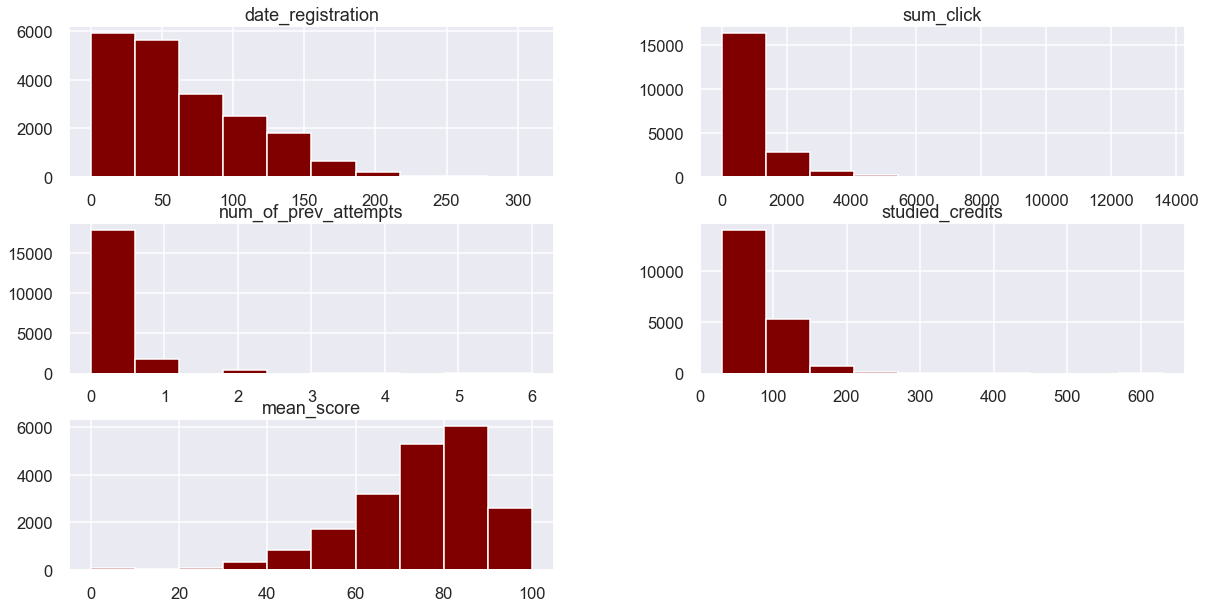

In [5]:
cols_num =['date_registration', 'sum_click', 'num_of_prev_attempts', 
            'studied_credits', 'mean_score']

df[cols_num].hist(figsize = (20,10), edgecolor="w", facecolor='maroon');

**Results:**

* Majority of the students register to courses within 50 days in advance
* Most of the students make within 2000 clicks on online Vle platform
* Only few students have more that 1 attempt 
* Majority have less than 100 studied credits

## Check Outliers

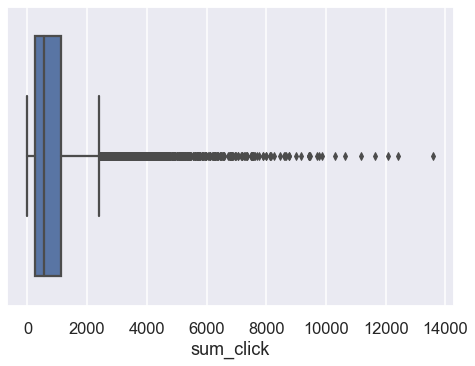

In [6]:
sns.boxplot(x=df['sum_click']);

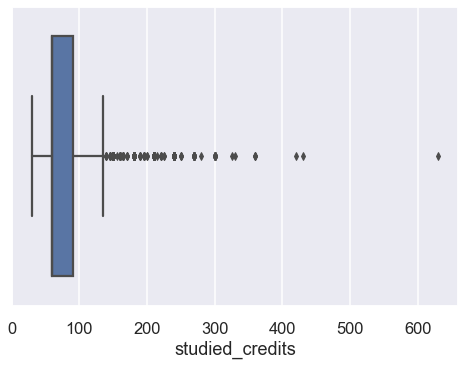

In [7]:
sns.boxplot(x=df['studied_credits']);

* There is vast amount of outliers in sum_click and studied_credits features. For now, I will keep them.

## Final Result vs Number of Students

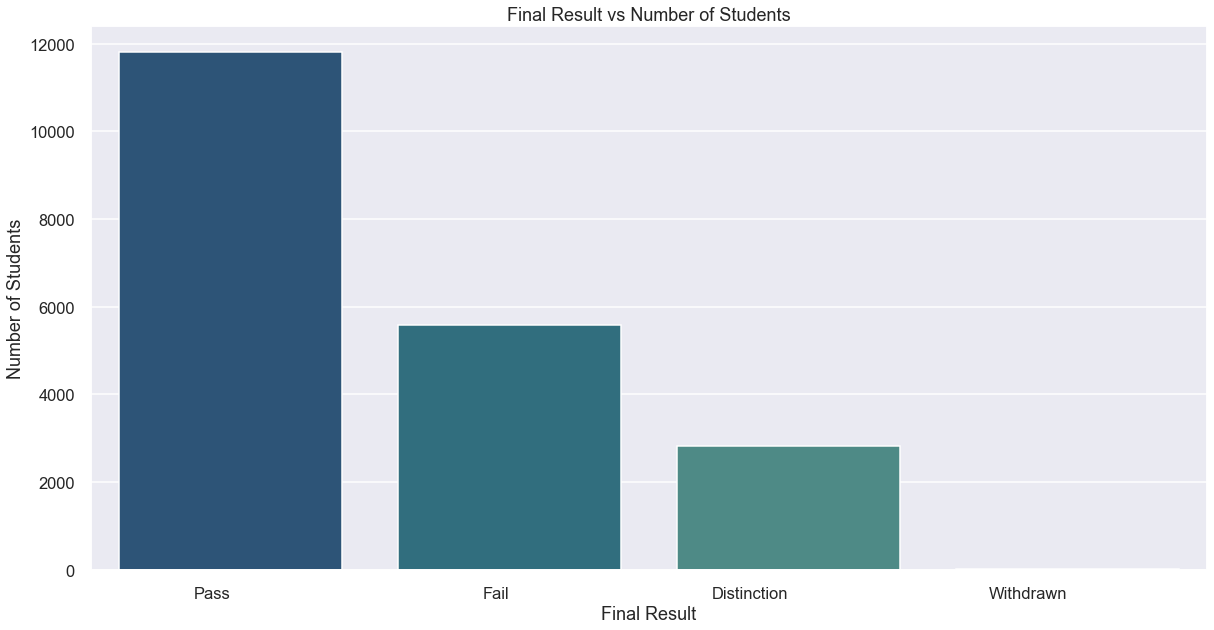

In [8]:
plt.figure(figsize =(20,10))
plt.xticks(horizontalalignment='right')

ax = sns.countplot(x="final_result", data=df,
                   order = df['final_result'].value_counts().index, 
                   palette = 'crest_r')

plt.xlabel('Final Result')
plt.ylabel('Number of Students')
plt.title('Final Result vs Number of Students')
plt.show()

In [9]:
df.final_result.value_counts()

Pass           11807
Fail            5576
Distinction     2821
Withdrawn         20
Name: final_result, dtype: int64

* After data cleaning, the dataset has only 20 observations of withdrawal result. And majority of observations have passing results.


## Code Module vs. Final Result 

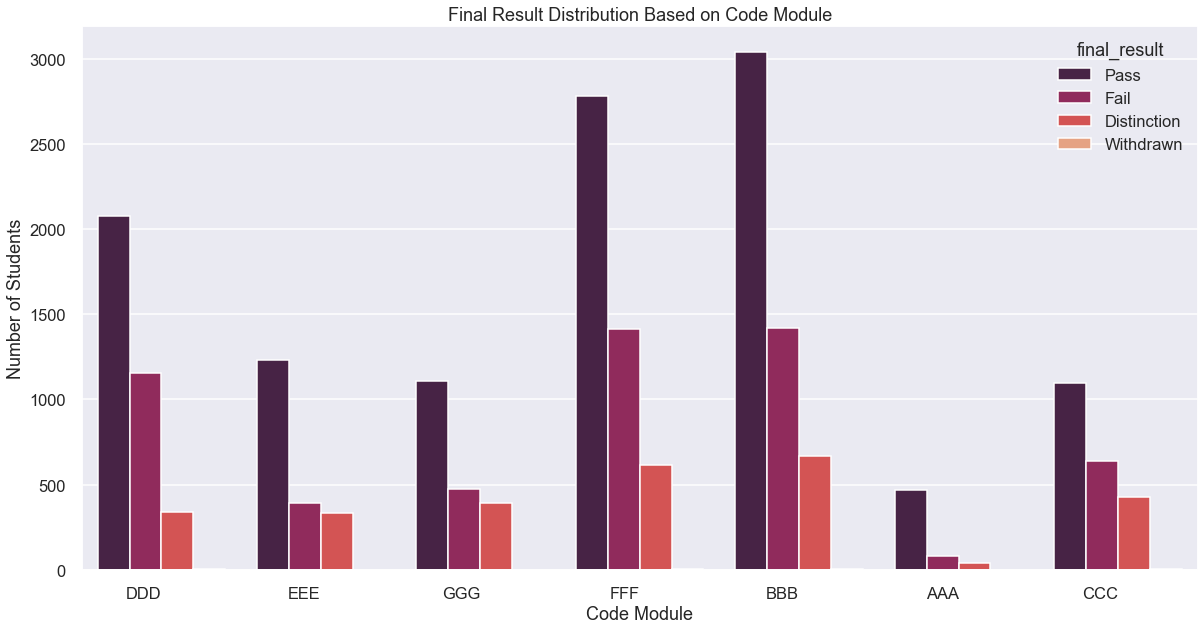

In [10]:
fig, ax = plt.subplots(figsize =(20,10))
plt.xticks(horizontalalignment='right')

sns.countplot(x="code_module", hue="final_result", palette="rocket", data=df)

plt.xlabel('Code Module')
plt.ylabel('Number of Students')
plt.title('Final Result Distribution Based on Code Module')
plt.show()

* Most of students are enrolled in FFF and BBB courses. There are twice as less failing students in most of the couses as are passing.

## Pass/Distinction vs Fail/Withdrawn 

Now I will separate dataset into two based on final results: pass_df = students who passed and was disticnt, fail_df = students who failed or withdraw

In [11]:
pass_df = df.loc[(df['final_result'] == 'Pass') | (df['final_result'] == 'Distintion')]
pass_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11807 entries, 0 to 20223
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   module_presentation_length  11807 non-null  int64  
 1   code_module                 11807 non-null  object 
 2   code_presentation           11807 non-null  object 
 3   id_student                  11807 non-null  object 
 4   date_registration           11807 non-null  int64  
 5   sum_click                   11807 non-null  int64  
 6   gender                      11807 non-null  object 
 7   region                      11807 non-null  object 
 8   highest_education           11807 non-null  object 
 9   imd_band                    11807 non-null  object 
 10  age_band                    11807 non-null  object 
 11  num_of_prev_attempts        11807 non-null  int64  
 12  studied_credits             11807 non-null  int64  
 13  disability                  118

# Passed/Distinct Students Analysis

## Education Level

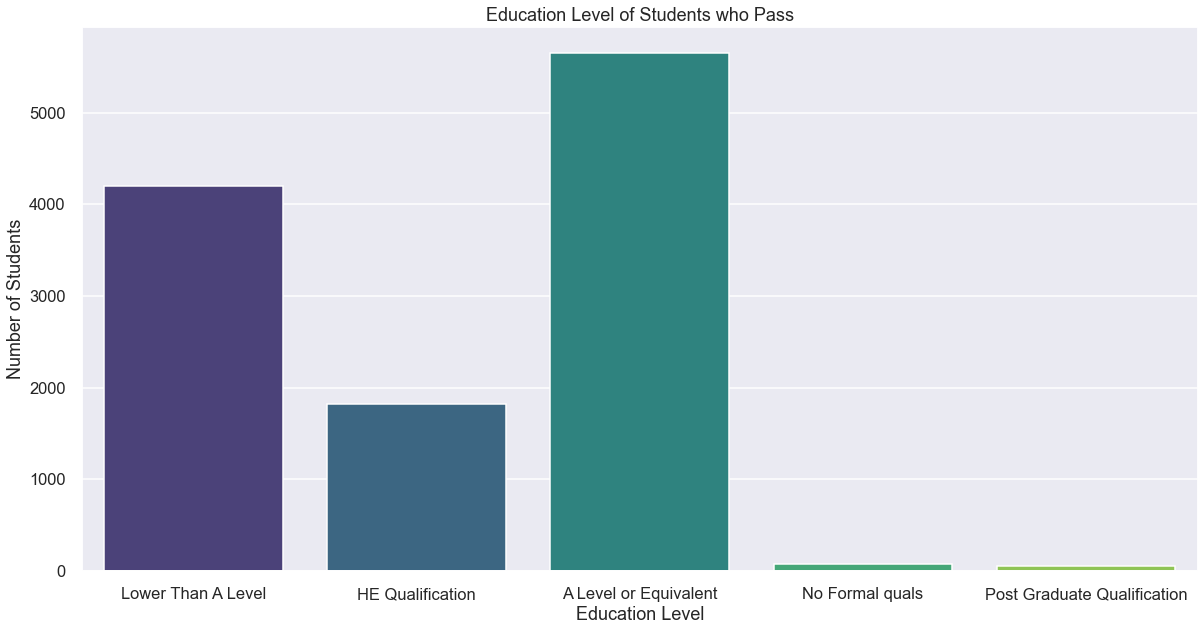

In [12]:
fig, ax = plt.subplots(figsize =(20,10))

sns.countplot(x="highest_education", palette="viridis", data=pass_df)

plt.xlabel('Education Level')
plt.ylabel('Number of Students')
plt.title('Education Level of Students who Pass')
plt.show()

* **Most of the students who passed the course had A Level of Education.**

## Final Result Distribution Based on Gender 

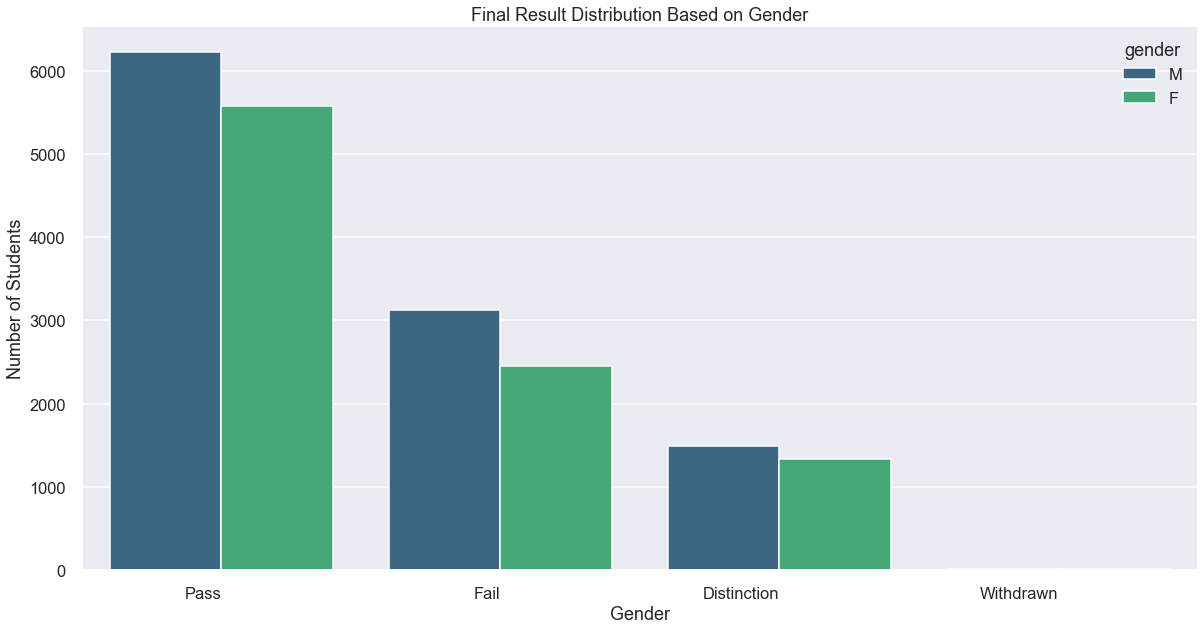

In [14]:
fig, ax = plt.subplots(figsize =(20,10))
plt.xticks(horizontalalignment='right')

sns.countplot(x="final_result", hue="gender", palette="viridis", data=df)

plt.xlabel('Gender')
plt.ylabel('Number of Students')
plt.title('Final Result Distribution Based on Gender')
plt.show()

### !!!!!!!!!!!!!!!!!!

## Education Level vs Results

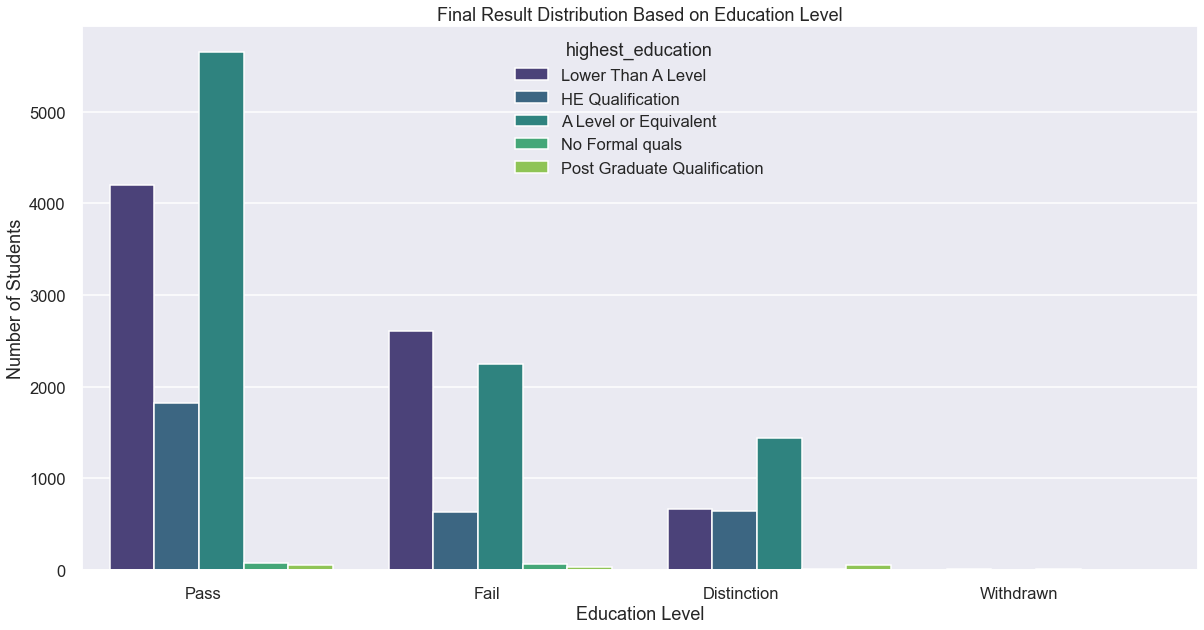

In [15]:
fig, ax = plt.subplots(figsize =(20,10))
plt.xticks(horizontalalignment='right')

sns.countplot(x="final_result", hue="highest_education", palette="viridis", data=df)

plt.xlabel('Education Level')
plt.ylabel('Number of Students')
plt.title('Final Result Distribution Based on Education Level')
plt.show()

### !!!!!!!!!!!!!!!!!!

## Final Result Based on IMD Band

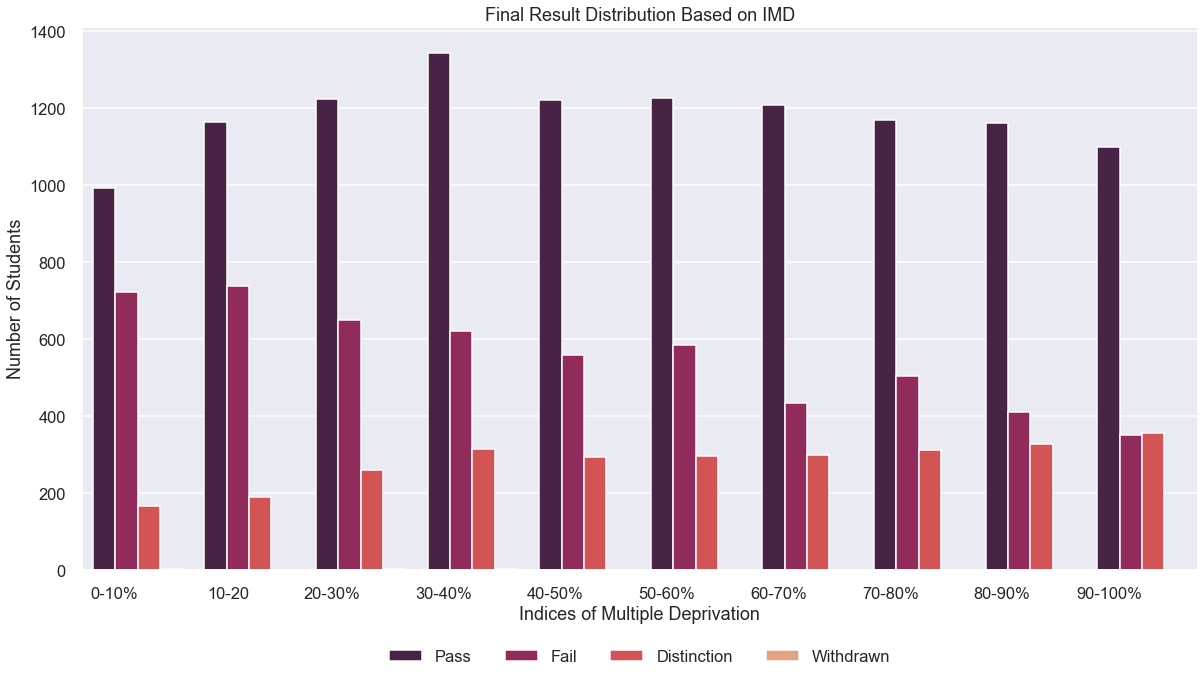

In [16]:
imd_pnt = df.groupby('imd_band')['final_result'].value_counts().reset_index(name='Percentage')

fig, ax = plt.subplots(figsize =(20,10))
plt.xticks(horizontalalignment='right')

sns.barplot(x='imd_band', y ='Percentage',data=imd_pnt,  hue='final_result', palette='rocket')

plt.xlabel('Indices of Multiple Deprivation')
plt.ylabel('Number of Students')
plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -0.2), ncol = 4)
plt.title('Final Result Distribution Based on IMD')
plt.show()

## Passing Percentage Based on IMD

In [17]:
pass_stud = df.loc[df['final_result'] == 'Pass']

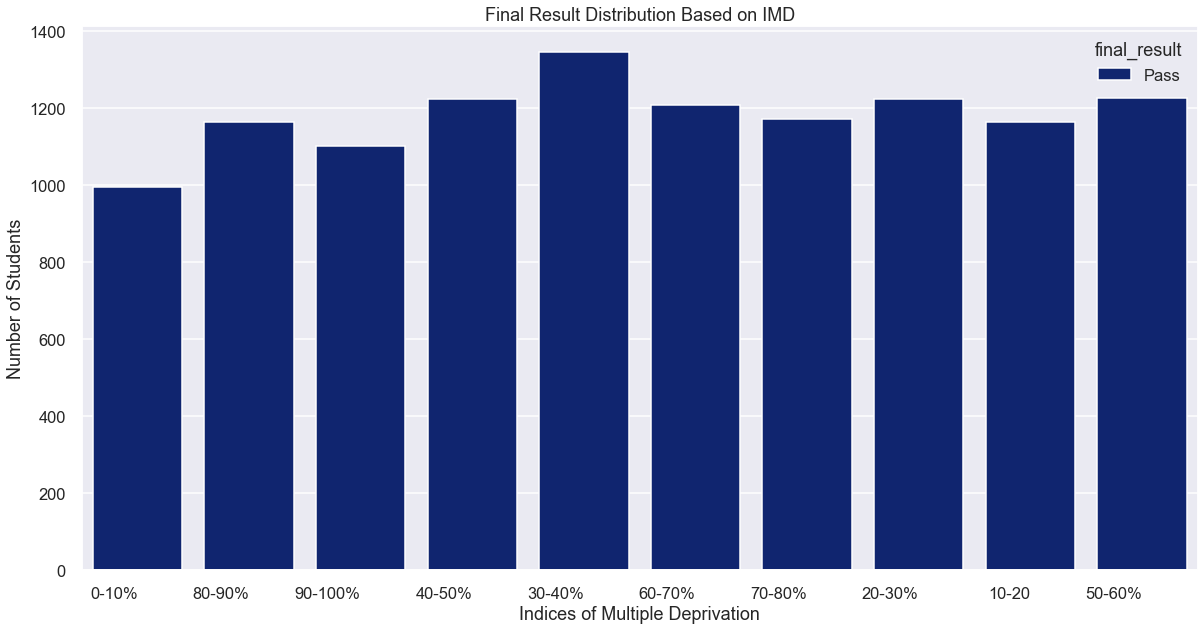

In [20]:
plt.figure(figsize =(20,10))
plt.xticks(horizontalalignment='right')

sns.countplot(x="imd_band", hue="final_result", palette="dark", data=pass_stud)

plt.xlabel('Indices of Multiple Deprivation')
plt.ylabel('Number of Students')
plt.title('Final Result Distribution Based on IMD')
plt.show()

## Final Result Based on Age Band

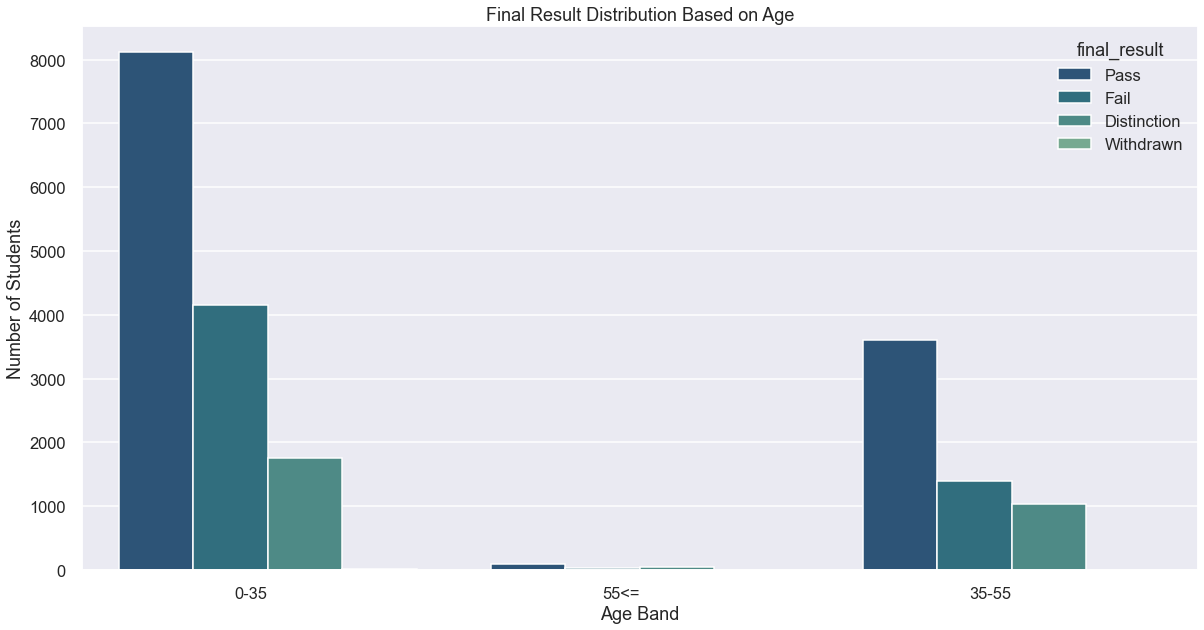

In [21]:
fig, ax = plt.subplots(figsize =(20,10))
plt.xticks(horizontalalignment='right')

sns.countplot(x="age_band", hue="final_result", palette="crest_r", data=df)

plt.xlabel('Age Band')
plt.ylabel('Number of Students')
plt.title('Final Result Distribution Based on Age')
plt.show()

* Most students are in 0-35 age band

## Disability vs Final Result

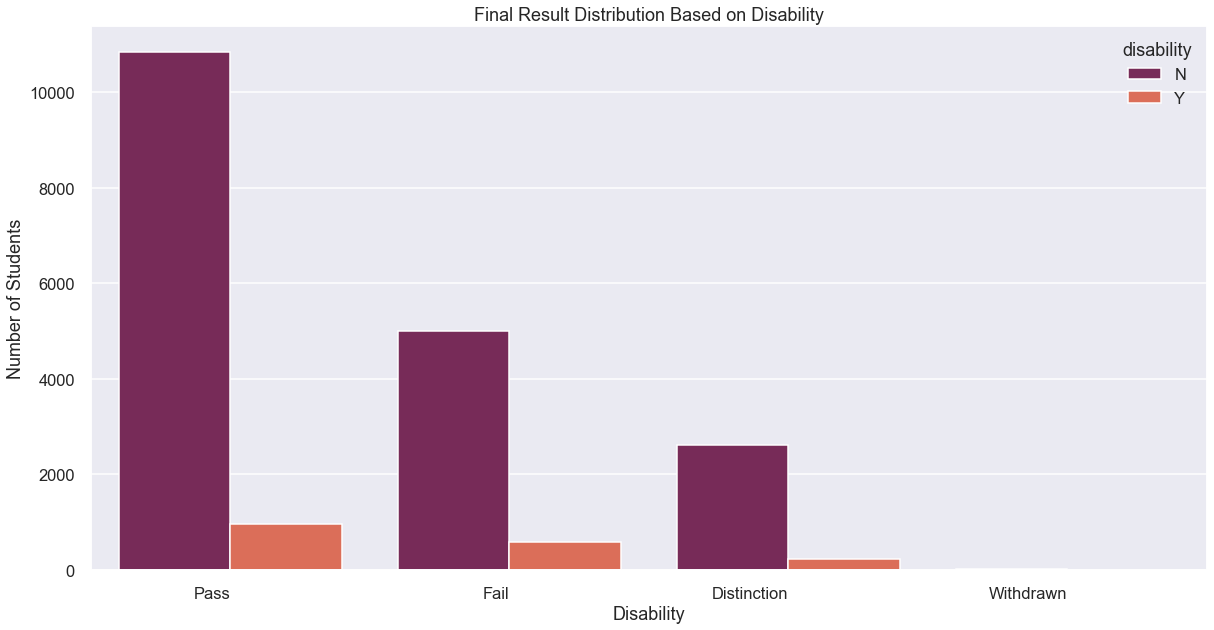

In [22]:
fig, ax = plt.subplots(figsize =(20,10))
plt.xticks(horizontalalignment='right')

sns.countplot(x="final_result", hue="disability", palette="rocket", data=df)

plt.xlabel('Disability')
plt.ylabel('Number of Students')
plt.title('Final Result Distribution Based on Disability')
plt.show()

## Number of Clicks vs. Final Result

In [27]:
#clicks = df.groupby(['code_module', 'final_result'])['sum_click'].sum().reset_index(name='number')

In [28]:
#clicks

In [29]:
# fig, ax = plt.subplots(figsize =(20,10))
# plt.xticks(horizontalalignment='right')

# sns.barplot(x='code_module', y ='number',data=clicks,  hue='final_result', palette='rocket')

# plt.xlabel('Code Module')
# plt.ylabel('Number of Clicks')
# plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -0.2), ncol = 4)
# plt.title('Final Result Distribution Based on Number of Clicks in Code Module')
# plt.show()

### Save the DataFrame

In [30]:
pd.DataFrame.to_csv(df, '../data/final_data.csv', sep=',', na_rep=' ', index=False)